In [4]:
import numpy as np
import scipy.io as sio


import matplotlib
import matplotlib.pyplot as plt

import cartopy
import cartopy.crs as ccrs

from cartopy.io.shapereader import Reader
from cartopy.feature import ShapelyFeature

%matplotlib inline

In [13]:
def crt_MeteoSwiss_colormap(cmapname):
    
    full_info = {'hotcold':['#181870', '#104e8b', '#1774cd', '#4876ff', '#5baced', '#add7e6', '#d1eded', '#e5eff9', '#f2ffff', '#ffffff', '#fdf5e6', '#ffe4b4', '#f3a460', '#ed7600', '#cd661d', '#e0310f', '#ed0000', '#cd0000', '#8b0000'],
                 'hotcolr':['#000032', '#181870', '#104e8b', '#1774cd', '#4876ff', '#5baced', '#add7e6', '#d1eded', '#e5eff9', '#f2ffff', '#fdf5e6', '#ffe4b4', '#f3a460', '#ed7600', '#cd661d', '#e0310f', '#ed0000', '#cd0000', '#8b0000', '#320000'],
                 'mch':['#ffffff', '#000000', '#202020', '#404040', '#606060', '#808080', '#a0a0a0', '#c0c0c0', '#e0e0e0', '#ff0000', '#00ff00', '#0000ff', '#ffff00', '#00ffff', '#ff00ff'],
                 'perc2':['#d7e3ee', '#b5caff', '#8fb3ff', '#7f97ff', '#abcf63', '#e8f59e', '#fffa14', '#ffd121', '#ffa30a', '#ff4c00'],
                 'percent':['#640096', '#2730d7', '#598dfc', '#8befd9', '#60cf91', '#1a9850', '#91cf60', '#d9ef8b', '#fee08b', '#fc8d59', '#d73027', '#960064'],
                 'precip1':['#ffffff', '#edfac2', '#cdffcd', '#99f0b2', '#53bd9f', '#32a696', '#3296b4', '#0570b0', '#05508c', '#0a1f96', '#2c0246', '#6a2c5a'],
                 'precip2_15':['#ffffff', '#640064', '#af00af', '#dc00dc', '#3232c8', '#0064ff', '#009696', '#00c832', '#64ff00', '#96ff00', '#c8ff32', '#ffff00', '#ffc800', '#ffa000', '#ff7d00', '#e11900'],
                 'precip2_17':['#ffffff', '#ebf6ff', '#d6e2ff', '#b5c9ff', '#8eb2ff', '#7f96ff', '#7285f8', '#6370f8', '#009e1e', '#3cbc3d', '#b3d16e', '#b9f96e', '#fff913', '#ffa309', '#e50000', '#bd0000', '#810000', '#000000'],
                 'precip3':['#ffffff', '#d6e2ff', '#b5c9ff', '#8eb2ff', '#7f96ff', '#6370f7', '#0063ff', '#009696', '#00c633', '#63ff00', '#96ff00', '#c6ff33', '#ffff00', '#ffc600', '#ffa000', '#ff7c00', '#ff1900'],
                 'precip3_15':['#ffffff', '#d6e2ff', '#b5c9ff', '#8eb2ff', '#7f96ff', '#6370f7', '#0063ff', '#009696', '#00c633', '#63ff00', '#96ff00', '#c6ff33', '#ffff00', '#ffc600', '#ffa000'],
                 'precip4':['#fefefe', '#dffff9', '#9ad9ca', '#67c2a3', '#40ad75', '#32a696', '#5aa0cd', '#4292c7', '#4c8dc4', '#072f6b', '#071e46', '#4c0073'],
                 'precip4_diff':['#6b2107', '#b53b21', '#c75542', '#cd695a', '#a63237', '#ad4058', '#c26772', '#d99a9f', '#ffdfe0', '#fefefe', '#fefefe', '#dffff9', '#9ad9ca', '#67c2a3', '#40ad75', '#32a696', '#5aa0cd', '#4292c7', '#4c8dc4', '#072f6b'],
                 'precip1_diff_12':['#b66a28', '#cd853f', '#e1a564', '#f5cd84', '#f5e09e', '#fff5ba', '#ffffff', '#cdffcd', '#99f0b2', '#53bd9f', '#6eaac8', '#0570b0', '#023858'],
                 'precip1_diff_1':['#53bd9f', '#e1a564'],
                 'spread':['#ffffff', '#ffe1e1', '#ffd2d2', '#ffa5a5', '#ff7878', '#ff4b4b', '#ff0000', '#ff6400', '#ff9600', '#ffc800', '#ffff00', '#8cff00', '#00ff00', '#00cd5f', '#0091c8', '#0000ff'],
                 'sunshine':['#ffffff', '#fff5cc', '#ffe670', '#ffcc33', '#ffaf33', '#ff9933', '#ff6f33', '#ff5500', '#e6281e', '#c81e14'],
                 'sunshine_diff':['#510979', '#950fdf', '#b74bf3', '#cb7ef6', '#e1b4fa', '#ecd0fc', '#ffffff', '#fff5cc', '#ffe670', '#ffcc33', '#ffaf33', '#ff6f00', '#e6281e'],
                 't2m':['#6de3ff', '#aff0ff', '#ffc4e2', '#ff99cc', '#ff00ff', '#800080', '#000080', '#4646ff', '#3366ff', '#85a2ff', '#ffffff', '#cccccc', '#b3b3b3', '#999999', '#606060', '#808000', '#005c00', '#008000', '#339966', '#9dd500', '#d4ff5b', '#ffff00', '#ffb870', '#ff9900', '#ff6600', '#ff0000', '#bc4b00', '#ab0038', '#800000', '#a370ff'],
                 'temp':['#071e46', '#072f6b', '#08529c', '#2171b5', '#4292c7', '#5aa0cd', '#78bfd6', '#aadce6', '#dbf5ff', '#f0fcff', '#fff0f5', '#ffe0e0', '#fcbbaa', '#fc9272', '#fb6a4a', '#f03c2b', '#cc181e', '#a60f14', '#780a0f', '#5f0000'],
                 'temp_diff_18':['#071e46', '#072f6b', '#08579c', '#2171b5', '#4292c7', '#5aa0cd', '#78bfd6', '#aadce6', '#dbf5ff', '#ffffff', '#ffe0e0', '#fcbbaa', '#fc9272', '#fb6a4a', '#f03c2b', '#cc181e', '#a60f14', '#780a0f', '#5f0000'],
                 'temp_diff_1':['#f03c2b', '#2171b5'],
                 'topo':['#28369a', '#00c932', '#1ed368', '#5ee074', '#a2eb82', '#dff892', '#f6e595', '#c8b276', '#a27e5e', '#8f6154', '#a27d74', '#b2968b', '#c7b0aa', '#dbcdca', '#ece4e2', '#ffffff'],
                 'wind':['#ffffff', '#eff4d1', '#e8f49e', '#aace63', '#e2ed16', '#ffed00', '#ffed82', '#f4d17f', '#eda549', '#e58c3d', '#db7c3d', '#ef073d', '#e856a3', '#9b70a8', '#6370f7', '#7f96ff', '#8eb2ff', '#b5c9ff'],
                 'demo':'Here is a list of the colormaps:\n  hotcold\n  hotcolr\n  mch\n  perc2\n  percent\n  precip1\n  precip2_15\n  precip2_17\n  precip3\n  precip4\n  precip4_diff\n  precip_diff_12\n  precip_diff_1\n  spread\n  sunshine\n  sunshine_diff\n  t2m\n  temp\n  temp_diff_18\n  temp_diff_1\n  topo\n  wind',
                }
    if cmapname=='demo':
        print(full_info.get('demo'))
    else:
        return matplotlib.colors.ListedColormap(full_info.get(cmapname))

## 1. P and T, scatter plot

In [5]:
infile = 'data/Sci_Social_demo-03.data_part01.mat'

mean_PRISM = sio.loadmat(infile)['mean_PRISM'][0]
mean_WRF = sio.loadmat(infile)['mean_WRF'][0]
p95P_PRISM = sio.loadmat(infile)['p95P_PRISM'][0]
p95P_WRF = sio.loadmat(infile)['p95P_WRF'][0]
Tmean_ref = sio.loadmat(infile)['Tmean_ref'][0]
Tmean_wrf = sio.loadmat(infile)['Tmean_wrf'][0]
Tstd_ref = sio.loadmat(infile)['Tstd_ref'][0]
Tstd_wrf = sio.loadmat(infile)['Tstd_wrf'][0]

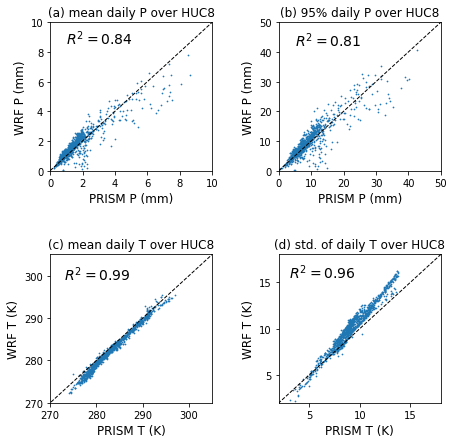

In [6]:
fig1 = plt.figure(figsize=(7,7))

ax1 = plt.subplot2grid((10,7), (0,0), rowspan=4,colspan=3)
ax1.scatter(mean_PRISM, mean_WRF, s=0.5)
ax1.plot(np.arange(11), np.arange(11), linewidth=1, linestyle='--', color='black')
ax1.set_xlim([0,10])
ax1.set_ylim([0,10])
ax1.set_xlabel('PRISM P (mm)', size=12)
ax1.set_ylabel('WRF P (mm)', size=12)
ax1.set_title('(a) mean daily P over HUC8', size=12)
ax1.text(1,8.5, r'$R^2=%.2f$' % (np.corrcoef(mean_PRISM, mean_WRF)[0,1]**2), size=14)

ax2 = plt.subplot2grid((10,7), (0,4), rowspan=4, colspan=3)
ax2.scatter(p95P_PRISM, p95P_WRF, s=0.5)
ax2.plot(np.arange(51), np.arange(51), linewidth=1, linestyle='--', color='black')
ax2.set_xlim([0,50])
ax2.set_ylim([0,50])
ax2.set_xlabel('PRISM P (mm)', size=12)
ax2.set_ylabel('WRF P (mm)', size=12)
ax2.set_title('(b) 95% daily P over HUC8', size=12)
ax2.text(5,42, r'$R^2=%.2f$' % (np.corrcoef(p95P_PRISM, p95P_WRF)[0,1]**2), size=14)

ax3 = plt.subplot2grid((10,7), (6,0), rowspan=4,colspan=3)
ax3.scatter(Tmean_ref, Tmean_wrf, s=0.5)
ax3.plot(np.arange(320), np.arange(320), linewidth=1, linestyle='--', color='black')
ax3.set_xlim([270,305])
ax3.set_ylim([270,305])
ax3.set_yticks([270,280,290,300])
ax3.set_xlabel('PRISM T (K)', size=12)
ax3.set_ylabel('WRF T (K)', size=12)
ax3.set_title('(c) mean daily T over HUC8', size=12)
ax3.text(273, 299, r'$R^2=%.2f$' % (np.corrcoef(Tmean_ref, Tmean_wrf)[0,1]**2), size=14)


ax4 = plt.subplot2grid((10,7), (6,4), rowspan=4,colspan=3)
ax4.scatter(Tstd_ref, Tstd_wrf, s=0.5)
ax4.plot(np.arange(20), np.arange(20), linewidth=1, linestyle='--', color='black')
ax4.set_xlim([2,18])
ax4.set_ylim([2,18])
ax4.set_yticks([5,10,15])
ax4.set_xlabel('PRISM T (K)', size=12)
ax4.set_ylabel('WRF T (K)', size=12)
ax4.set_title('(d) std. of daily T over HUC8', size=12)
ax4.text(3, 15.5, r'$R^2=%.2f$' % (np.corrcoef(Tstd_ref, Tstd_wrf)[0,1]**2), size=14)

plt.show()
#fig1.savefig('/raid1/chen423/serdp/data/paper2_analysis/intermediate_data/model_validation/P_T_validation.png', dpi=600)
fig1.clf()

## 2. runoff, show a map

In [8]:
def visualize_wUS_map(axes, indata, location, cmap, norm, title='', method='', ylim=[26,55]):
    
    axes.pcolormesh(lons, lats, indata, cmap=cmap, norm=norm, zorder=2)
    axes.set_xlim([-127, -100])
    axes.set_ylim(ylim)

    axes.add_feature(cartopy.feature.OCEAN, linewidth=0.5, facecolor='aliceblue', edgecolor='k', zorder=0)
    axes.add_feature(cartopy.feature.LAND, linewidth=0.5, facecolor='none', edgecolor='k', zorder=1)


    countries = cartopy.feature.NaturalEarthFeature(category='cultural', scale='10m', edgecolor='black', linewidth=0.25,\
                                                    facecolor='none', name='admin_1_states_provinces')
    axes.add_feature(countries, zorder=3)

    gl = axes.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linestyle='-', alpha=1)
    gl.xlabels_top = location[0]
    gl.xlabels_bottom = location[1]
    gl.ylabels_left = location[2]
    gl.ylabels_right = location[3]
    gl.xlocator = matplotlib.ticker.FixedLocator(np.arange(-180,-59,10))
    gl.ylocator = matplotlib.ticker.FixedLocator(np.arange(0,81,10))
    gl.xformatter = cartopy.mpl.gridliner.LONGITUDE_FORMATTER
    gl.yformatter = cartopy.mpl.gridliner.LATITUDE_FORMATTER
    gl.xlabel_style = {'size': 8, 'color': 'grey'}
    gl.ylabel_style = {'size': 8, 'color': 'grey'}
    
    axes.text(-108, 53, method, horizontalalignment='center', size=13, zorder=4)
    axes.set_title(title, size=12)

In [16]:
infile = 'data/Sci_Social_demo-03.data_part02.mat'

lons = sio.loadmat(infile)['lons'][0]
lats = sio.loadmat(infile)['lats'][0]
runoff_ref_sea = sio.loadmat(infile)['runoff_ref_sea']
runoff_wrf_sea = sio.loadmat(infile)['runoff_wrf_sea']
common_mask = sio.loadmat(infile)['common_mask']

In [11]:
# seasonal runoff
runoff_ref_sea_ma = np.ma.masked_array(runoff_ref_sea, mask=common_mask[0:4])
runoff_wrf_sea_ma = np.ma.masked_array(runoff_wrf_sea, mask=common_mask[0:4])

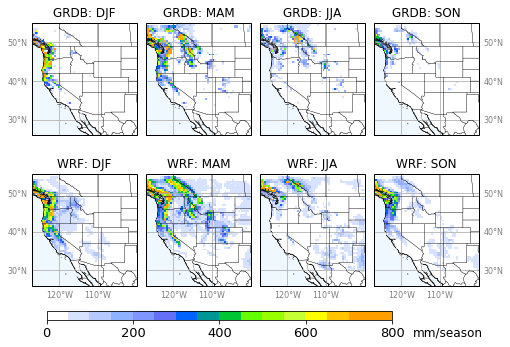

In [17]:
norm = matplotlib.colors.BoundaryNorm(np.linspace(0,800,17), 16)

fig2 = plt.figure(figsize=(8,6))

ax1 = plt.subplot2grid((11,8), (0,0), colspan=2, rowspan=4, projection=ccrs.PlateCarree())
ax2 = plt.subplot2grid((11,8), (0,2), colspan=2, rowspan=4, projection=ccrs.PlateCarree())
ax3 = plt.subplot2grid((11,8), (0,4), colspan=2, rowspan=4, projection=ccrs.PlateCarree())
ax4 = plt.subplot2grid((11,8), (0,6), colspan=2, rowspan=4, projection=ccrs.PlateCarree())
ax5 = plt.subplot2grid((11,8), (5,0), colspan=2, rowspan=4, projection=ccrs.PlateCarree())
ax6 = plt.subplot2grid((11,8), (5,2), colspan=2, rowspan=4, projection=ccrs.PlateCarree())
ax7 = plt.subplot2grid((11,8), (5,4), colspan=2, rowspan=4, projection=ccrs.PlateCarree())
ax8 = plt.subplot2grid((11,8), (5,6), colspan=2, rowspan=4, projection=ccrs.PlateCarree())

visualize_wUS_map(ax1, runoff_ref_sea_ma[0], [False,False,True,False], title='GRDB: DJF',
                  cmap=crt_MeteoSwiss_colormap('precip3_15'), norm=norm)
visualize_wUS_map(ax2, runoff_ref_sea_ma[1], [False,False,False,False], title='GRDB: MAM',
                  cmap=crt_MeteoSwiss_colormap('precip3_15'), norm=norm)
visualize_wUS_map(ax3, runoff_ref_sea_ma[2], [False,False,False,False], title='GRDB: JJA',
                  cmap=crt_MeteoSwiss_colormap('precip3_15'), norm=norm)
visualize_wUS_map(ax4, runoff_ref_sea_ma[3], [False,False,False,True], title='GRDB: SON',
                  cmap=crt_MeteoSwiss_colormap('precip3_15'), norm=norm)

visualize_wUS_map(ax5, runoff_wrf_sea_ma[0], [False,True,True,False], title='WRF: DJF',
                  cmap=crt_MeteoSwiss_colormap('precip3_15'), norm=norm)
visualize_wUS_map(ax6, runoff_wrf_sea_ma[1], [False,True,False,False], title='WRF: MAM',
                  cmap=crt_MeteoSwiss_colormap('precip3_15'), norm=norm)
visualize_wUS_map(ax7, runoff_wrf_sea_ma[2], [False,True,False,False], title='WRF: JJA',
                  cmap=crt_MeteoSwiss_colormap('precip3_15'), norm=norm)
visualize_wUS_map(ax8, runoff_wrf_sea_ma[3], [False,True,False,True], title='WRF: SON',
                  cmap=crt_MeteoSwiss_colormap('precip3_15'), norm=norm)

cbar_ax1 = fig2.add_axes([0.15, 0.19, 0.6, 0.02])
cb1 = matplotlib.colorbar.ColorbarBase(cbar_ax1, cmap=crt_MeteoSwiss_colormap('precip3_15'), 
                                       norm=norm, ticks=[0,200,400,600,800], orientation='horizontal')
cb1.set_ticklabels(['0','200','400','600','800'])
cbar_ax1.tick_params(labelsize=13)
cbar_ax1.text(1.06, -2, 'mm/season', size=12)

plt.show()
#fig2.savefig('/raid1/chen423/serdp/data/paper2_analysis/intermediate_data/model_validation/runoff_validation.png', dpi=600)
fig2.clf()

## 3. ET and SWE, show some maps

- ET is evaluated against MODIS

- SWE is evaluated against SNOTEL

In [32]:
infile = 'data/Sci_Social_demo-03.data_part03.mat'

x = sio.loadmat(infile)['x'][0]
y_wrf = sio.loadmat(infile)['y_wrf'][0]
y_ref = sio.loadmat(infile)['y_ref'][0]

SWE_evaluation_results = sio.loadmat(infile)['SWE_evaluation_results']
lats_wrf = sio.loadmat(infile)['lats_wrf']
lons_wrf = sio.loadmat(infile)['lons_wrf']

ET_corrs_8day = sio.loadmat(infile)['ET_corrs_8day']

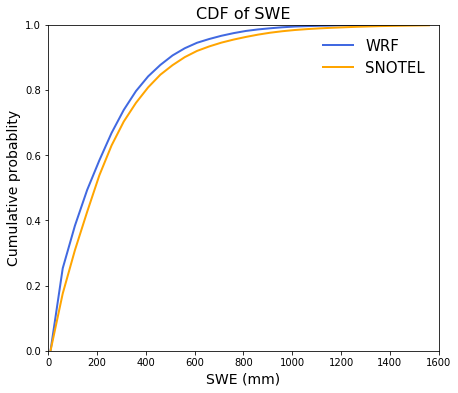

<Figure size 432x288 with 0 Axes>

In [30]:
fig_SWE = plt.figure(figsize=(7,6))
ax1 = plt.subplot(1,1,1)

ax1.plot(x, y_wrf, 'royalblue', linewidth=2, label='WRF')
ax1.plot(x, y_ref, 'orange', linewidth=2, label='SNOTEL')
ax1.set_xlim([0,1600])
ax1.set_ylim([0,1])
ax1.set_xlabel('SWE (mm)', size=14)
ax1.set_ylabel('Cumulative probablity', size=14)
ax1.legend(loc='upper right', frameon=False, fontsize=15)
ax1.set_title('CDF of SWE', size=16)

plt.show()
plt.clf()

del(fig_SWE)

### What about showing the plots of SWE and ET in a figure?

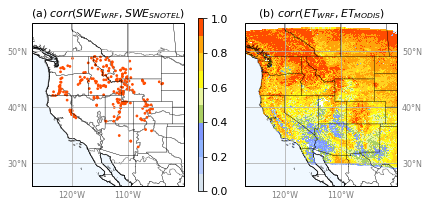

In [34]:
fig3 = plt.figure(figsize=(7,3))

ax1 = plt.subplot2grid((1,2), (0,0), rowspan=1, colspan=1, projection=ccrs.PlateCarree())
ax2 = plt.subplot2grid((1,2), (0,1), rowspan=1, colspan=1, projection=ccrs.PlateCarree())

cmap = crt_MeteoSwiss_colormap('perc2')

# 1st panel, SWE
ax1.scatter(SWE_evaluation_results[:,1], SWE_evaluation_results[:,0], s=3, 
            c=np.ones(245), cmap=cmap, vmin=0, vmax=1,
            linewidths=None, edgecolors=None, zorder=2)
ax1.set_xlim([-127, -100])
ax1.set_ylim([26,55])

ax1.add_feature(cartopy.feature.OCEAN, linewidth=0.5, facecolor='aliceblue', edgecolor='k', zorder=0)
ax1.add_feature(cartopy.feature.LAND, linewidth=0.5, facecolor='none', edgecolor='k', zorder=1)

countries = cartopy.feature.NaturalEarthFeature(category='cultural', scale='10m', edgecolor='black', linewidth=0.25,
                                                facecolor='none', name='admin_1_states_provinces')
ax1.add_feature(countries, zorder=3)

gl = ax1.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linestyle='-', alpha=1)
gl.xlabels_top = False
gl.xlabels_bottom = True
gl.ylabels_left = True
gl.ylabels_right = False
gl.xlocator = matplotlib.ticker.FixedLocator(np.arange(-180,-59,10))
gl.ylocator = matplotlib.ticker.FixedLocator(np.arange(0,81,10))
gl.xformatter = cartopy.mpl.gridliner.LONGITUDE_FORMATTER
gl.yformatter = cartopy.mpl.gridliner.LATITUDE_FORMATTER
gl.xlabel_style = {'size': 8, 'color': 'grey'}
gl.ylabel_style = {'size': 8, 'color': 'grey'}    

ax1.set_title(r'(a) $corr(SWE_{WRF}, SWE_{SNOTEL})$', size=11)
    
    
# 2nd panel
ax2.pcolormesh(lons_wrf, lats_wrf, np.ma.masked_array(ET_corrs_8day, mask=ET_corrs_8day==0), cmap=cmap, vmin=0, vmax=1, zorder=2)
ax2.set_xlim([-127, -100])
ax2.set_ylim([26,55])

ax2.add_feature(cartopy.feature.OCEAN, linewidth=0.5, facecolor='aliceblue', edgecolor='k', zorder=0)
ax2.add_feature(cartopy.feature.LAND, linewidth=0.5, facecolor='none', edgecolor='k', zorder=1)



countries = cartopy.feature.NaturalEarthFeature(category='cultural', scale='10m', edgecolor='black', linewidth=0.25,
                                                facecolor='none', name='admin_1_states_provinces')
ax2.add_feature(countries, zorder=3)

gl = ax2.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linestyle='-', alpha=1)
gl.xlabels_top = False
gl.xlabels_bottom = True
gl.ylabels_left = False
gl.ylabels_right = True
gl.xlocator = matplotlib.ticker.FixedLocator(np.arange(-180,-59,10))
gl.ylocator = matplotlib.ticker.FixedLocator(np.arange(0,81,10))
gl.xformatter = cartopy.mpl.gridliner.LONGITUDE_FORMATTER
gl.yformatter = cartopy.mpl.gridliner.LATITUDE_FORMATTER
gl.xlabel_style = {'size': 8, 'color': 'grey'}
gl.ylabel_style = {'size': 8, 'color': 'grey'}    

ax2.set_title(r'(b) $corr(ET_{WRF}, ET_{MODIS})$', size=11)

cbar_ax1 = fig3.add_axes([0.48, 0.1, 0.01, 0.8])
cb1 = matplotlib.colorbar.ColorbarBase(cbar_ax1, cmap=cmap, ticks=[0,0.2,0.4,0.6,0.8,1], orientation='vertical')
#cb1.set_ticklabels(['0','0.25','1'])
cbar_ax1.tick_params(labelsize=11)

plt.show()
fig3.clf()

del(fig3)

### Well, it is OK, but there is no way to put the CDF info, unfortunately...

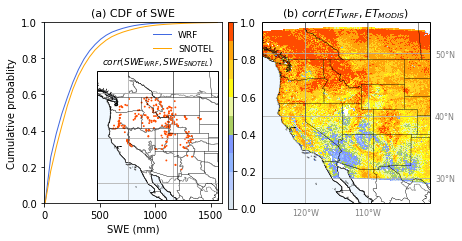

In [35]:
fig3_v2 = plt.figure(figsize=(7,3.5))

ax1p = plt.subplot2grid((20,2), (0,0), rowspan=19, colspan=1)
ax2 = plt.subplot2grid((20,2), (0,1), rowspan=19, colspan=1, projection=ccrs.PlateCarree())
# key for inserting a small panel within the large panel
ax1 = fig3_v2.add_axes((0.23, 0.16, 0.24, 0.54), projection=ccrs.PlateCarree())
for axis in [ax1p, ax1, ax2]:
    axis.axhline(linewidth=0.5)
    axis.axvline(linewidth=0.5)

cmap = crt_MeteoSwiss_colormap('perc2')

# panel 1, SWE
ax1p.plot(x, y_wrf, 'royalblue', linewidth=1, label='WRF')
ax1p.plot(x, y_ref, 'orange', linewidth=1, label='SNOTEL')
ax1p.set_xlim([0,1600])
ax1p.set_ylim([0,1])
ax1p.set_xlabel('SWE (mm)', size=10)
ax1p.set_ylabel('Cumulative probablity', size=10)
ax1p.legend(loc='upper right', frameon=False, fontsize=9)
ax1p.set_title('(a) CDF of SWE', size=11)

# little panel
ax1.scatter(SWE_evaluation_results[:,1], SWE_evaluation_results[:,0], s=0.75, 
            c=np.ones(245), cmap=cmap, vmin=0, vmax=1,
            linewidths=None, edgecolors=None, zorder=2)
ax1.set_xlim([-127, -100])
ax1.set_ylim([26,55])

ax1.add_feature(cartopy.feature.OCEAN, linewidth=0.5, facecolor='aliceblue', edgecolor='k', zorder=0)
ax1.add_feature(cartopy.feature.LAND, linewidth=0.5, facecolor='none', edgecolor='k', zorder=1)

countries = cartopy.feature.NaturalEarthFeature(category='cultural', scale='10m', edgecolor='black', linewidth=0.25,
                                                facecolor='none', name='admin_1_states_provinces')
ax1.add_feature(countries, zorder=3)

gl = ax1.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linestyle='-', alpha=1)
gl.xlabels_top = False
gl.xlabels_bottom = False
gl.ylabels_left = False
gl.ylabels_right = False
gl.xlocator = matplotlib.ticker.FixedLocator(np.arange(-180,-59,10))
gl.ylocator = matplotlib.ticker.FixedLocator(np.arange(0,81,10))
gl.xformatter = cartopy.mpl.gridliner.LONGITUDE_FORMATTER
gl.yformatter = cartopy.mpl.gridliner.LATITUDE_FORMATTER
gl.xlabel_style = {'size': 8, 'color': 'grey'}
gl.ylabel_style = {'size': 8, 'color': 'grey'}    
ax1.set_title(r'$corr(SWE_{WRF}, SWE_{SNOTEL})$', size=9)


# panel 2, ET
ax2.pcolormesh(lons_wrf, lats_wrf, np.ma.masked_array(ET_corrs_8day, mask=ET_corrs_8day==0), cmap=cmap, vmin=0, vmax=1, zorder=2)
ax2.set_xlim([-127, -100])
ax2.set_ylim([26,55])

ax2.add_feature(cartopy.feature.OCEAN, linewidth=0.5, facecolor='aliceblue', edgecolor='k', zorder=0)
ax2.add_feature(cartopy.feature.LAND, linewidth=0.5, facecolor='none', edgecolor='k', zorder=1)

shpfile = 'data/shapefiles/HU2_wUS_R07-R18.shp'
shape_feature = ShapelyFeature(Reader(shpfile).geometries(), ccrs.PlateCarree(), 
                               facecolor='none', edgecolor='gray', linewidth=0.5)
ax2.add_feature(shape_feature)


countries = cartopy.feature.NaturalEarthFeature(category='cultural', scale='10m', edgecolor='black', linewidth=0.25,
                                                facecolor='none', name='admin_1_states_provinces')
ax2.add_feature(countries, zorder=3)

gl = ax2.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linestyle='-', alpha=1)
gl.xlabels_top = False
gl.xlabels_bottom = True
gl.ylabels_left = False
gl.ylabels_right = True
gl.xlocator = matplotlib.ticker.FixedLocator(np.arange(-180,-59,10))
gl.ylocator = matplotlib.ticker.FixedLocator(np.arange(0,81,10))
gl.xformatter = cartopy.mpl.gridliner.LONGITUDE_FORMATTER
gl.yformatter = cartopy.mpl.gridliner.LATITUDE_FORMATTER
gl.xlabel_style = {'size': 8, 'color': 'grey'}
gl.ylabel_style = {'size': 8, 'color': 'grey'}    

ax2.set_title(r'(b) $corr(ET_{WRF}, ET_{MODIS})$', size=11)

cbar_ax1 = fig3_v2.add_axes([0.49, 0.14, 0.01, 0.74])
cb1 = matplotlib.colorbar.ColorbarBase(cbar_ax1, cmap=cmap, ticks=[0,0.2,0.4,0.6,0.8,1], orientation='vertical')
cbar_ax1.tick_params(labelsize=10)

#fig3_v2.savefig('/raid1/chen423/serdp/data/paper2_analysis/intermediate_data/model_validation/SWE_ET_validation.png', dpi=600)

plt.show()
fig3_v2.clf()